In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import datetime,os,warnings,csv

import torch
from torch import functional as F
from torch import optim
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

import astropy.units as u
from astropy.io import fits
from astropy.utils.data import download_file,get_pkg_data_contents,get_pkg_data_filename
from spectral_cube import SpectralCube

from bs4 import BeautifulSoup
import requests

from astroquery.esasky import ESASky
from astroquery.gaia import Gaia

Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
esa_catalog = ESASky.list_catalogs()
esa_maps = ESASky.list_maps()

In [3]:
print(esa_catalog)

['LAMOST', 'AllWise', 'AKARI-IRC-SC', 'TwoMASS', 'INTEGRAL', 'CHANDRA-SC2', 'XMM-EPIC-STACK', 'XMM-EPIC', 'XMM-OM', 'XMM-SLEW', 'Tycho-2', 'Gaia-eDR3', 'Hipparcos-2', 'HSC', 'Herschel-HPPSC-070', 'Herschel-HPPSC-100', 'Herschel-HPPSC-160', 'Herschel-SPSC-250', 'Herschel-SPSC-350', 'Herschel-SPSC-500', 'Planck-PGCC', 'Planck-PCCS2E-HFI', 'Planck-PCCS2-HFI', 'Planck-PCCS2-LFI', 'Planck-PSZ2']


In [16]:
images = ESASky.get_images("m51", radius=10*u.arcmin,missions=['Herschel', 'ISO-IR'])

INFO: Starting download of HERSCHEL data. (25 files) [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342188329 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8637834&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342248041 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8605750&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342232463 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8638400&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342248040 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8605714&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esask

INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 57600101 from http://nida.esac.esa.int/nida-sl-tap/data?RETRIEVAL_TYPE=STANDALONE&tdt=57600101 [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 57600202 from http://nida.esac.esa.int/nida-sl-tap/data?RETRIEVAL_TYPE=STANDALONE&tdt=57600202 [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 01100217 from http://nida.esac.esa.int/nida-sl-tap/data?RETRIEVAL_TYPE=STANDALONE&tdt=1100217 [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 01100303 from http://nida.esac.esa.int/nida-sl-tap/data?RETRIEVAL_TYPE=STANDALONE&tdt=1100303 [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading of ISO-IR data complete. [astroquery.esasky.core]
INFO: Maps available at /Users/janlucasdeinhard/Dropbox/My Mac (MacBook-Pro.fritz.box)/Documents/Codehub/Github/pyfiles/16_PROJE

In [17]:
img = images['ISO-IR'][0]['PRIMARY'].data
img -= img.min()
img *= (1/img.max())

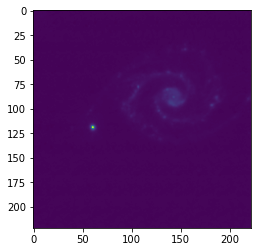

In [18]:
plt.imshow(img)
plt.show()

In [22]:
list(images.keys())

['HERSCHEL', 'ISO-IR']

In [23]:
result = ESASky.query_region_catalogs('M51',10*u.arcmin,['HSC','XMM-OM'])

In [24]:
result

TableList with 2 tables:
	'0:HSC' with 9 column(s) and 10000 row(s) 
	'1:XMM-OM' with 11 column(s) and 4849 row(s) 

In [68]:
result['HSC']

match_id,target_name,num_images,num_images_per_filter,ra,dec,filter,flux,flux_sigma
,,,,deg,deg,,mag,mag
int64,object,int32,int32,float64,float64,object,float64,float64
74322427,ANY,1,1,202.61456869987651,47.236027281528905,w2_f606w,22.27359962463379,0.0
43663426,ANY,1,1,202.60983037641913,47.239954203518906,w2_f606w,24.82430076599121,0.0
89325833,ANY,1,1,202.60565390796577,47.23721328091988,w2_f606w,24.43779945373535,0.0
20208733,ANY,1,1,202.60927379726783,47.23281784419133,w2_f606w,23.911399841308594,0.0
104010612,ANY,1,1,202.60849082745165,47.234891484947326,w2_f606w,24.25860023498535,0.0
41773403,ANY,1,1,202.60383838604994,47.23432744438235,w2_f606w,25.02739906311035,0.0
14392629,ANY,1,1,202.6093676129223,47.22989558600749,w2_f606w,24.59079933166504,0.0
81978073,ANY,1,1,202.60594248755217,47.23282451166112,w2_f606w,25.00029945373535,0.0


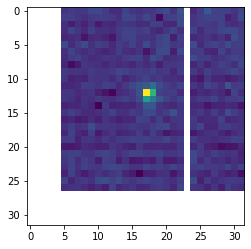

In [76]:
plt.imshow(images['ISO-IR'][5]['PRIMARY'].data[10,:,:])